# Boom Bikes Case Study

### Problem Statement: 
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


## Step 1: Data loading and Data Understanding

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [2]:
# Reading the csv file
df_bike = pd.read_csv('day.csv')

In [3]:
# Checking the first 5 rows of the data
df_bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df_bike.shape

(730, 16)

In [5]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df_bike[df_bike.duplicated()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [7]:
df_bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Inference: 
- From above we can see that there are 730 rows and 16 columns with no null values in the data.

In [8]:
# Checking details of the numeric data
df_bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Pre-Processing 

In [9]:
df_bike['instant'].value_counts()

1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: instant, Length: 730, dtype: int64

### Dropping the instant column as it is just the index value of each row.

In [10]:
# Dropping instant column
df_bike.drop(['instant'], axis=1, inplace= True)

In [11]:
df_bike.shape

(730, 15)

### Dropping the dteday column as we have the the date and day information in other columns

In [12]:
#Dropping dteday column
df_bike.drop(['dteday'], axis=1, inplace= True)

In [13]:
df_bike.shape

(730, 14)

### Dropping casual and registered columns as given in the problem.

In [14]:
#Dropping casual and registered columns
df_bike.drop(['casual','registered'], axis=1, inplace= True)

In [15]:
df_bike.shape

(730, 12)

### Converting season, mnth, weekday, weathersit to categorical variables

In [16]:
df_bike.season = df_bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
df_bike.mnth = df_bike.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

In [18]:
df_bike.weekday = df_bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [19]:
df_bike.weathersit = df_bike.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [20]:
df_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 3: Exploratory Data Analysis

### Numerical columns

In [21]:
#  Numerical columns
num_cols = ['cnt','temp','atemp','hum','windspeed']

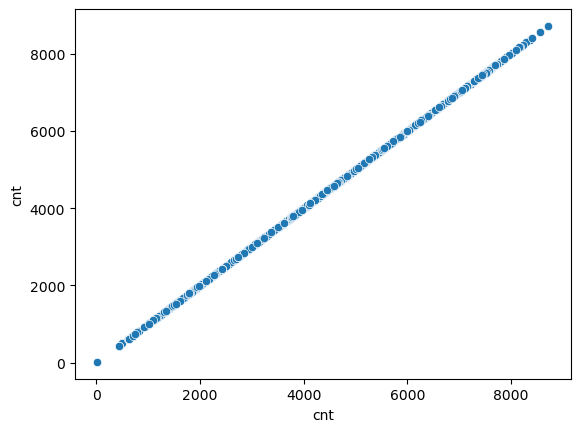

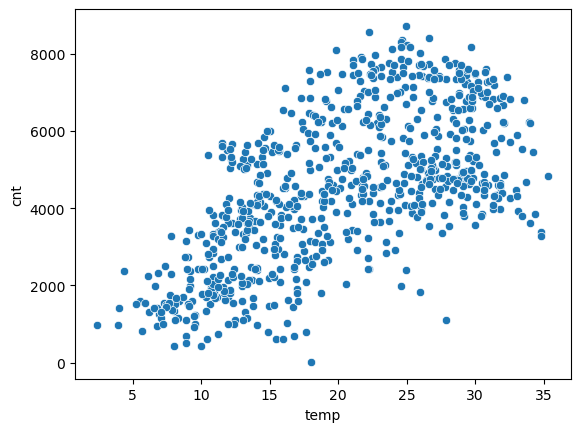

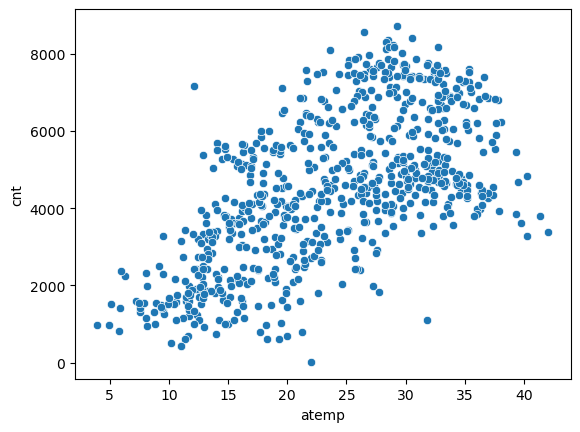

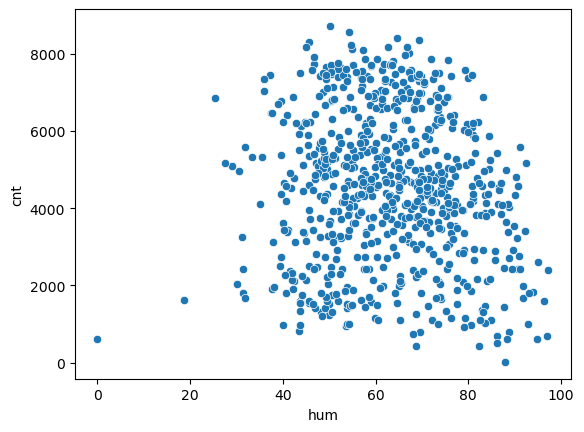

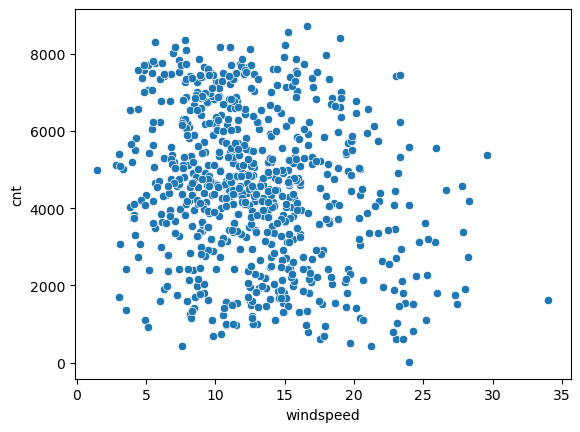

In [22]:
for i in num_cols:
    sns.scatterplot(x=df_bike[i], y=df_bike['cnt'])
    plt.show()

<Figure size 1500x3000 with 0 Axes>

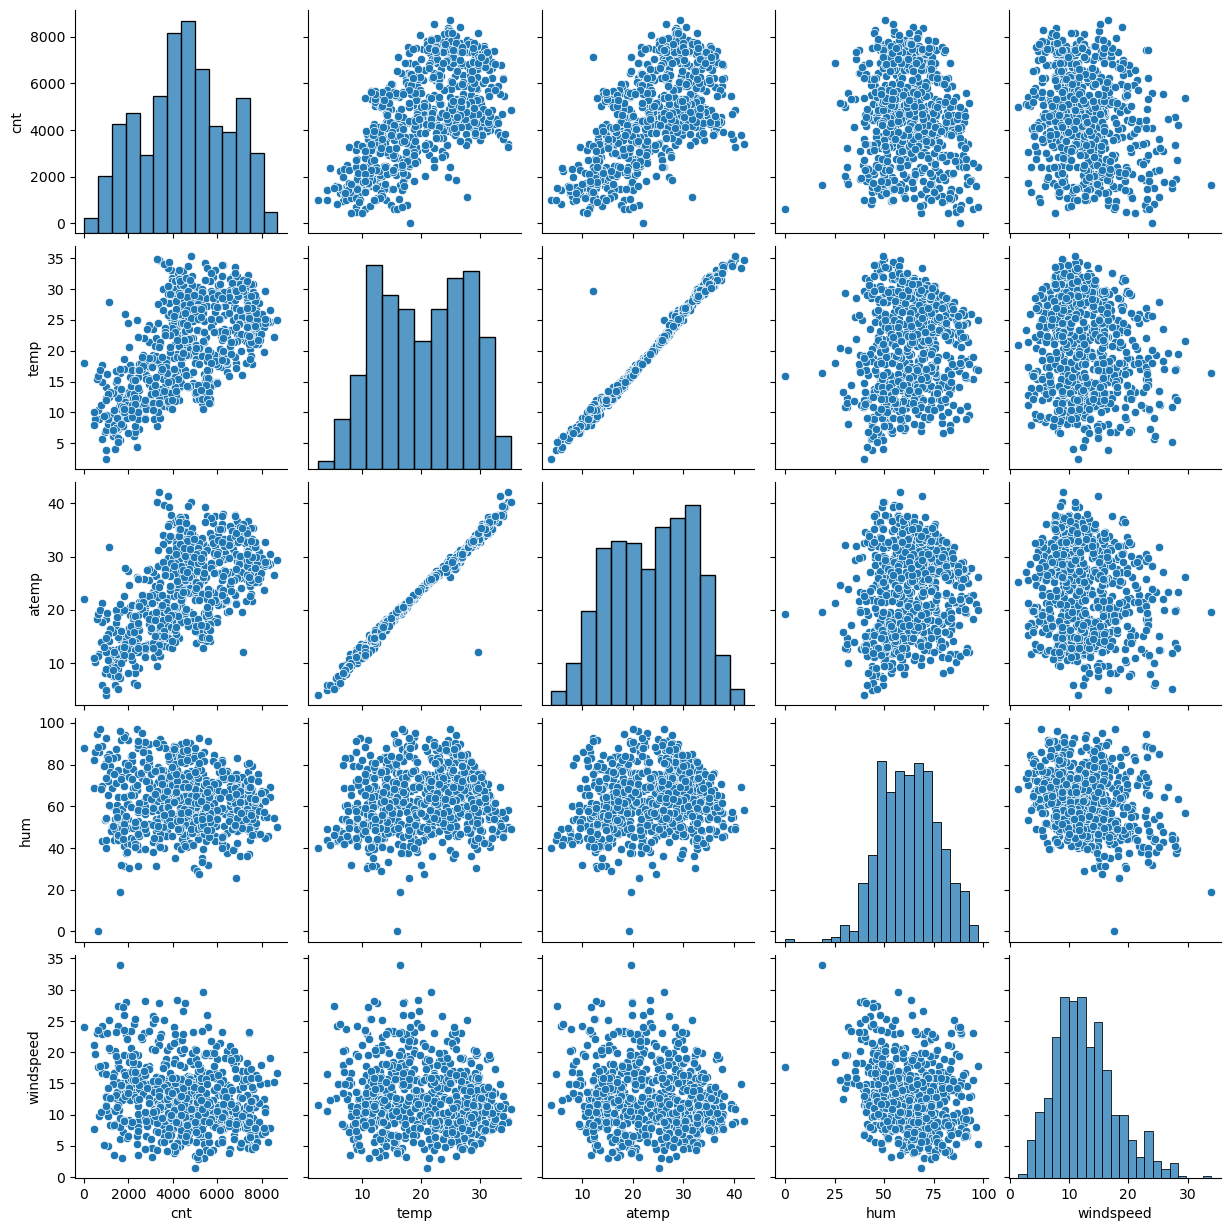

In [23]:
# Plotting the pair plots for numerical variables.
plt.figure(figsize = (15,30))
sns.pairplot(data=df_bike[num_cols])
plt.show()

In [24]:
df_bike[num_cols].corr()

,cnt,temp,atemp,hum,windspeed
cnt,1.000000,0.627044,0.630685,-0.098543,-0.235132
temp,0.627044,1.000000,0.991696,0.128565,-0.158186
atemp,0.630685,0.991696,1.000000,0.141512,-0.183876
hum,-0.098543,0.128565,0.141512,1.000000,-0.248506
windspeed,-0.235132,-0.158186,-0.183876,-0.248506,1.000000


<Axes: >

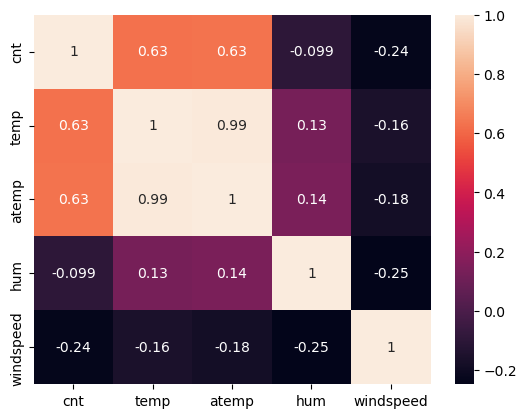

In [25]:
sns.heatmap(df_bike[num_cols].corr(), annot=True)

### Inference: 
- From the above heat map, we can see that temp and atemp have high positive correlation to the target variable cnt
- It is also seen that temp and atemp are highly correlated to each other. 

### Categorical columns

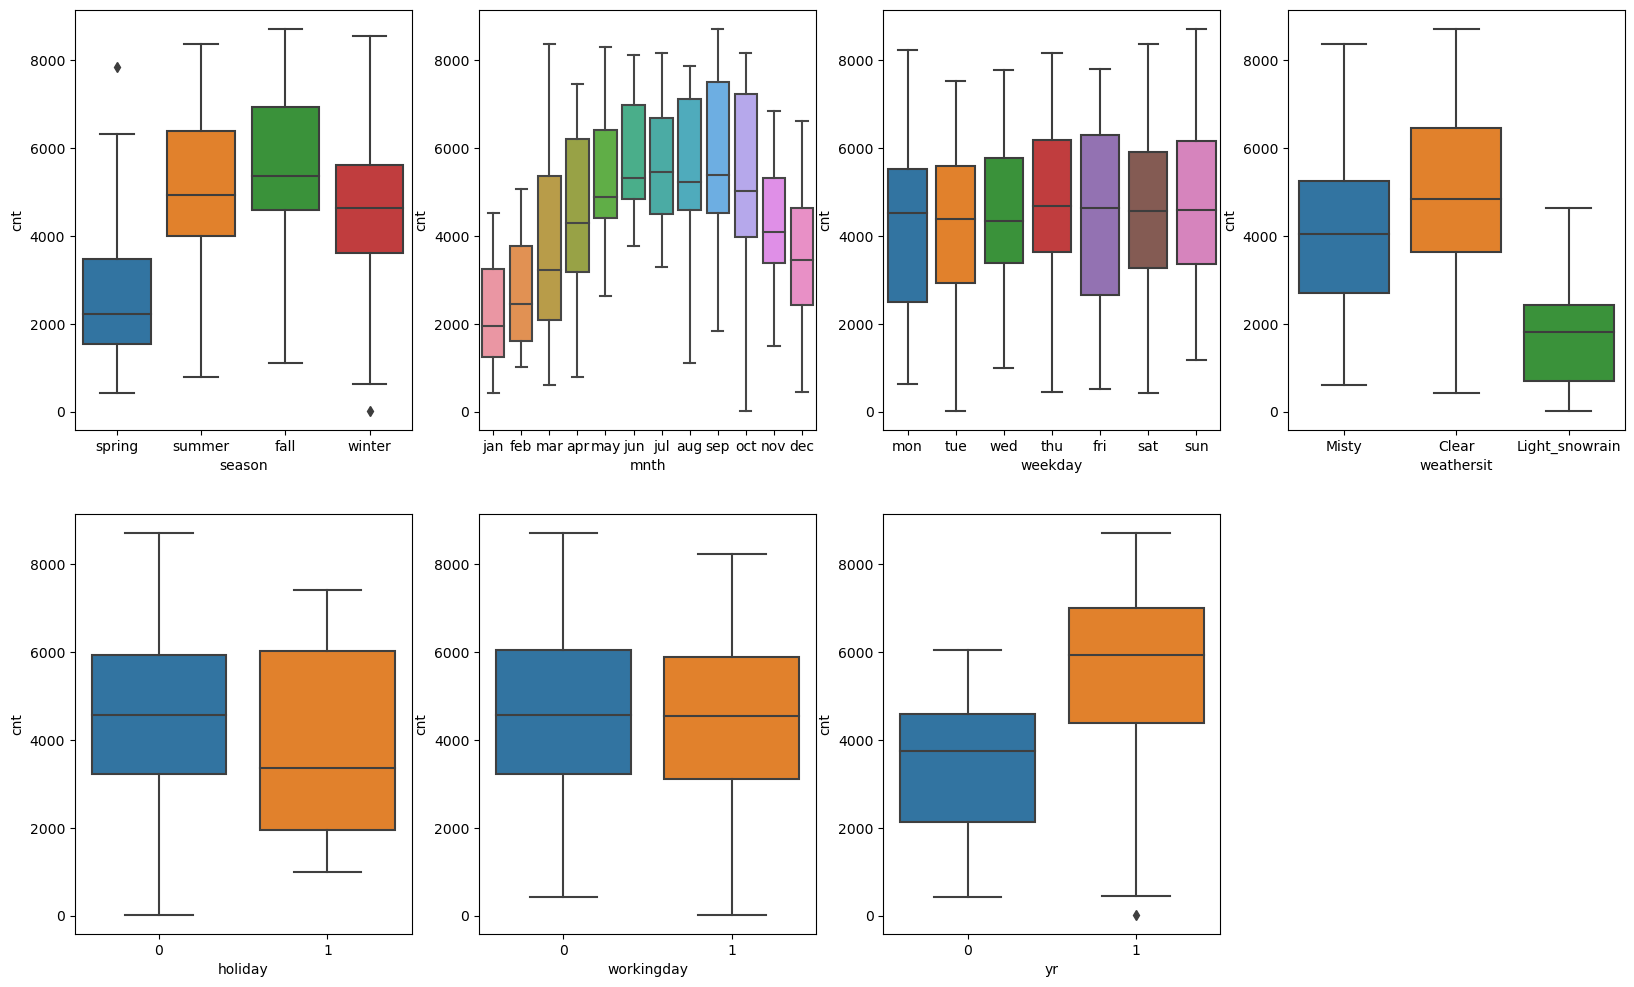

In [26]:
# Categorical columns

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = df_bike)
plt.show()

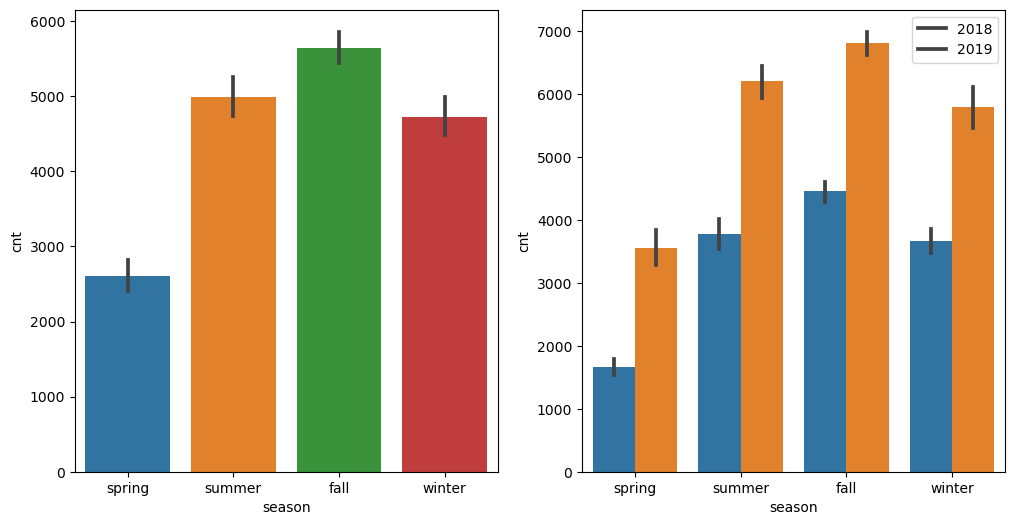

In [27]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x=df_bike.season, y=df_bike.cnt,data=df_bike)
plt.subplot(1,2,2)
sns.barplot(x=df_bike.season,y=df_bike.cnt,data=df_bike, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

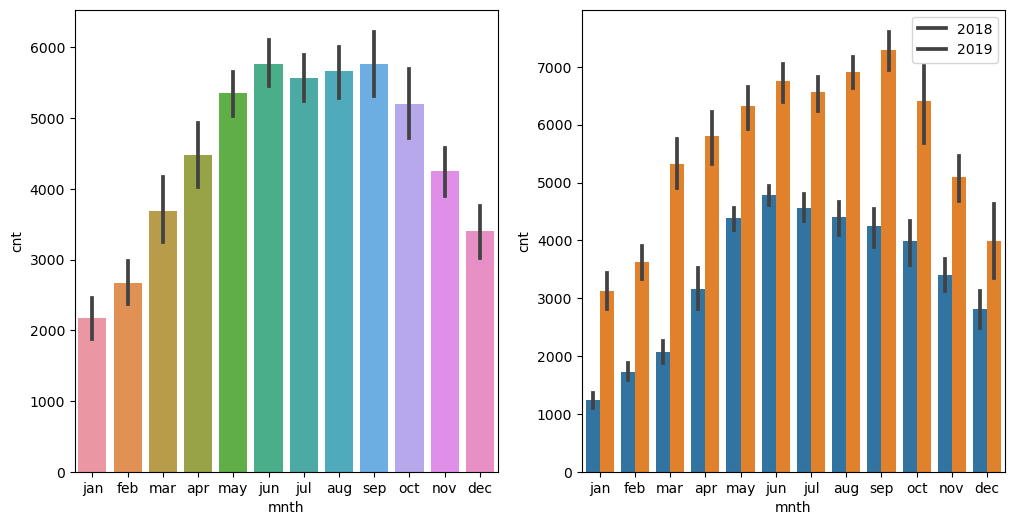

In [28]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x=df_bike.mnth, y=df_bike.cnt,data=df_bike)
plt.subplot(1,2,2)
sns.barplot(x=df_bike.mnth,y=df_bike.cnt,data=df_bike, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

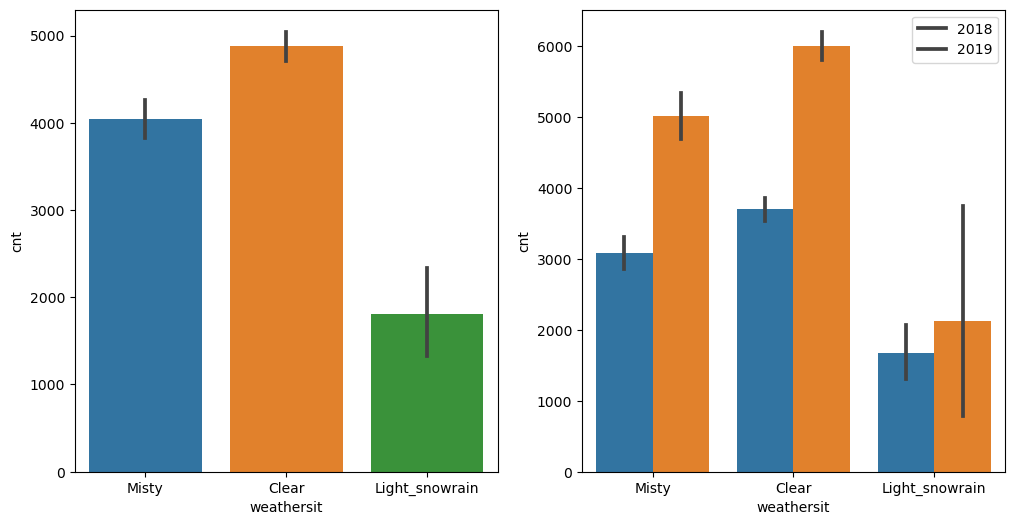

In [29]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x=df_bike.weathersit, y=df_bike.cnt,data=df_bike)
plt.subplot(1,2,2)
sns.barplot(x=df_bike.weathersit,y=df_bike.cnt,data=df_bike, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

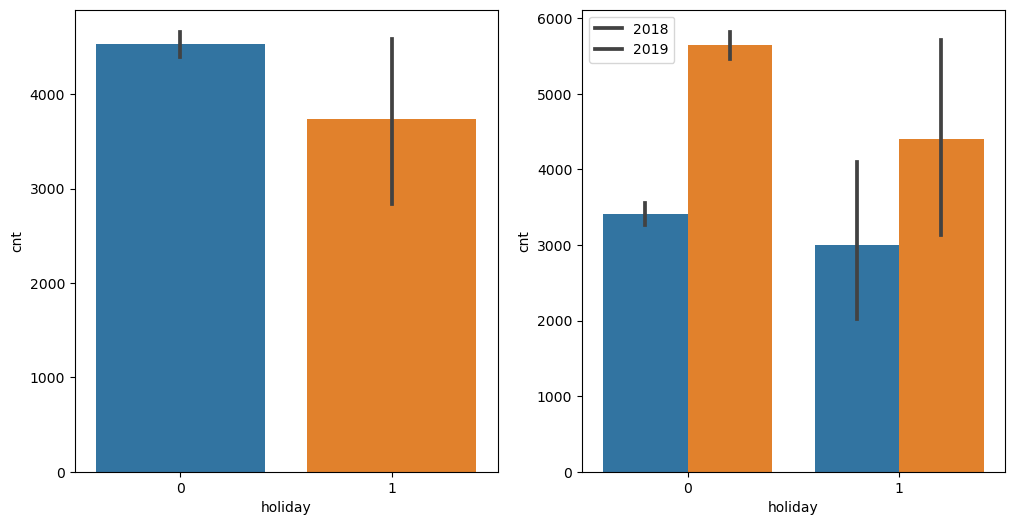

In [30]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x=df_bike.holiday, y=df_bike.cnt,data=df_bike)
plt.subplot(1,2,2)
sns.barplot(x=df_bike.holiday,y=df_bike.cnt,data=df_bike, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

### Inference:
- Summer and fall seasons (from the month april to october) seems to have higher number bookings
- People tend to use the bikes more during clear weather conditions
- The number of bookings have increased from 2018 to 2019
- The number of bookings go down when it is a holiday

## Step 4: Data preparation

### Creating dummy variables for categorical variables 

In [31]:
df_bike = pd.get_dummies(data=df_bike,columns=['season','mnth','weekday','weathersit'],drop_first=True)

In [32]:
df_bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df_bike.shape

(730, 30)

In [34]:
df_bike.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_Light_snowrain', 'weathersit_Misty'],
      dtype='object')

In [35]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    uint8  
 9   season_summer              730 non-null    uint8  
 10  season_winter              730 non-null    uint8  
 11  mnth_aug                   730 non-null    uint8  
 12  mnth_dec                   730 non-null    uint8  
 13  mnth_feb                   730 non-null    uint8  

## Step 5: Splitting the data into test and training sets 

In [36]:
#Train Test split with 70:30 ratio
df_train, df_test = train_test_split(df_bike, train_size= 0.7, test_size=0.3, random_state=100)

In [37]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


In [38]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [39]:
# Checking the size of train and test sets
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


### Rescaling the continous variables

In [40]:
scaler = MinMaxScaler()

In [41]:
# assigning the columns to a variable
num_cols = ['temp','atemp','hum','windspeed','cnt']

In [42]:
# Fitting and transforming the train data set.
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])

In [43]:
# Only transforming the test data set
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [44]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [45]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking the correlation between variables

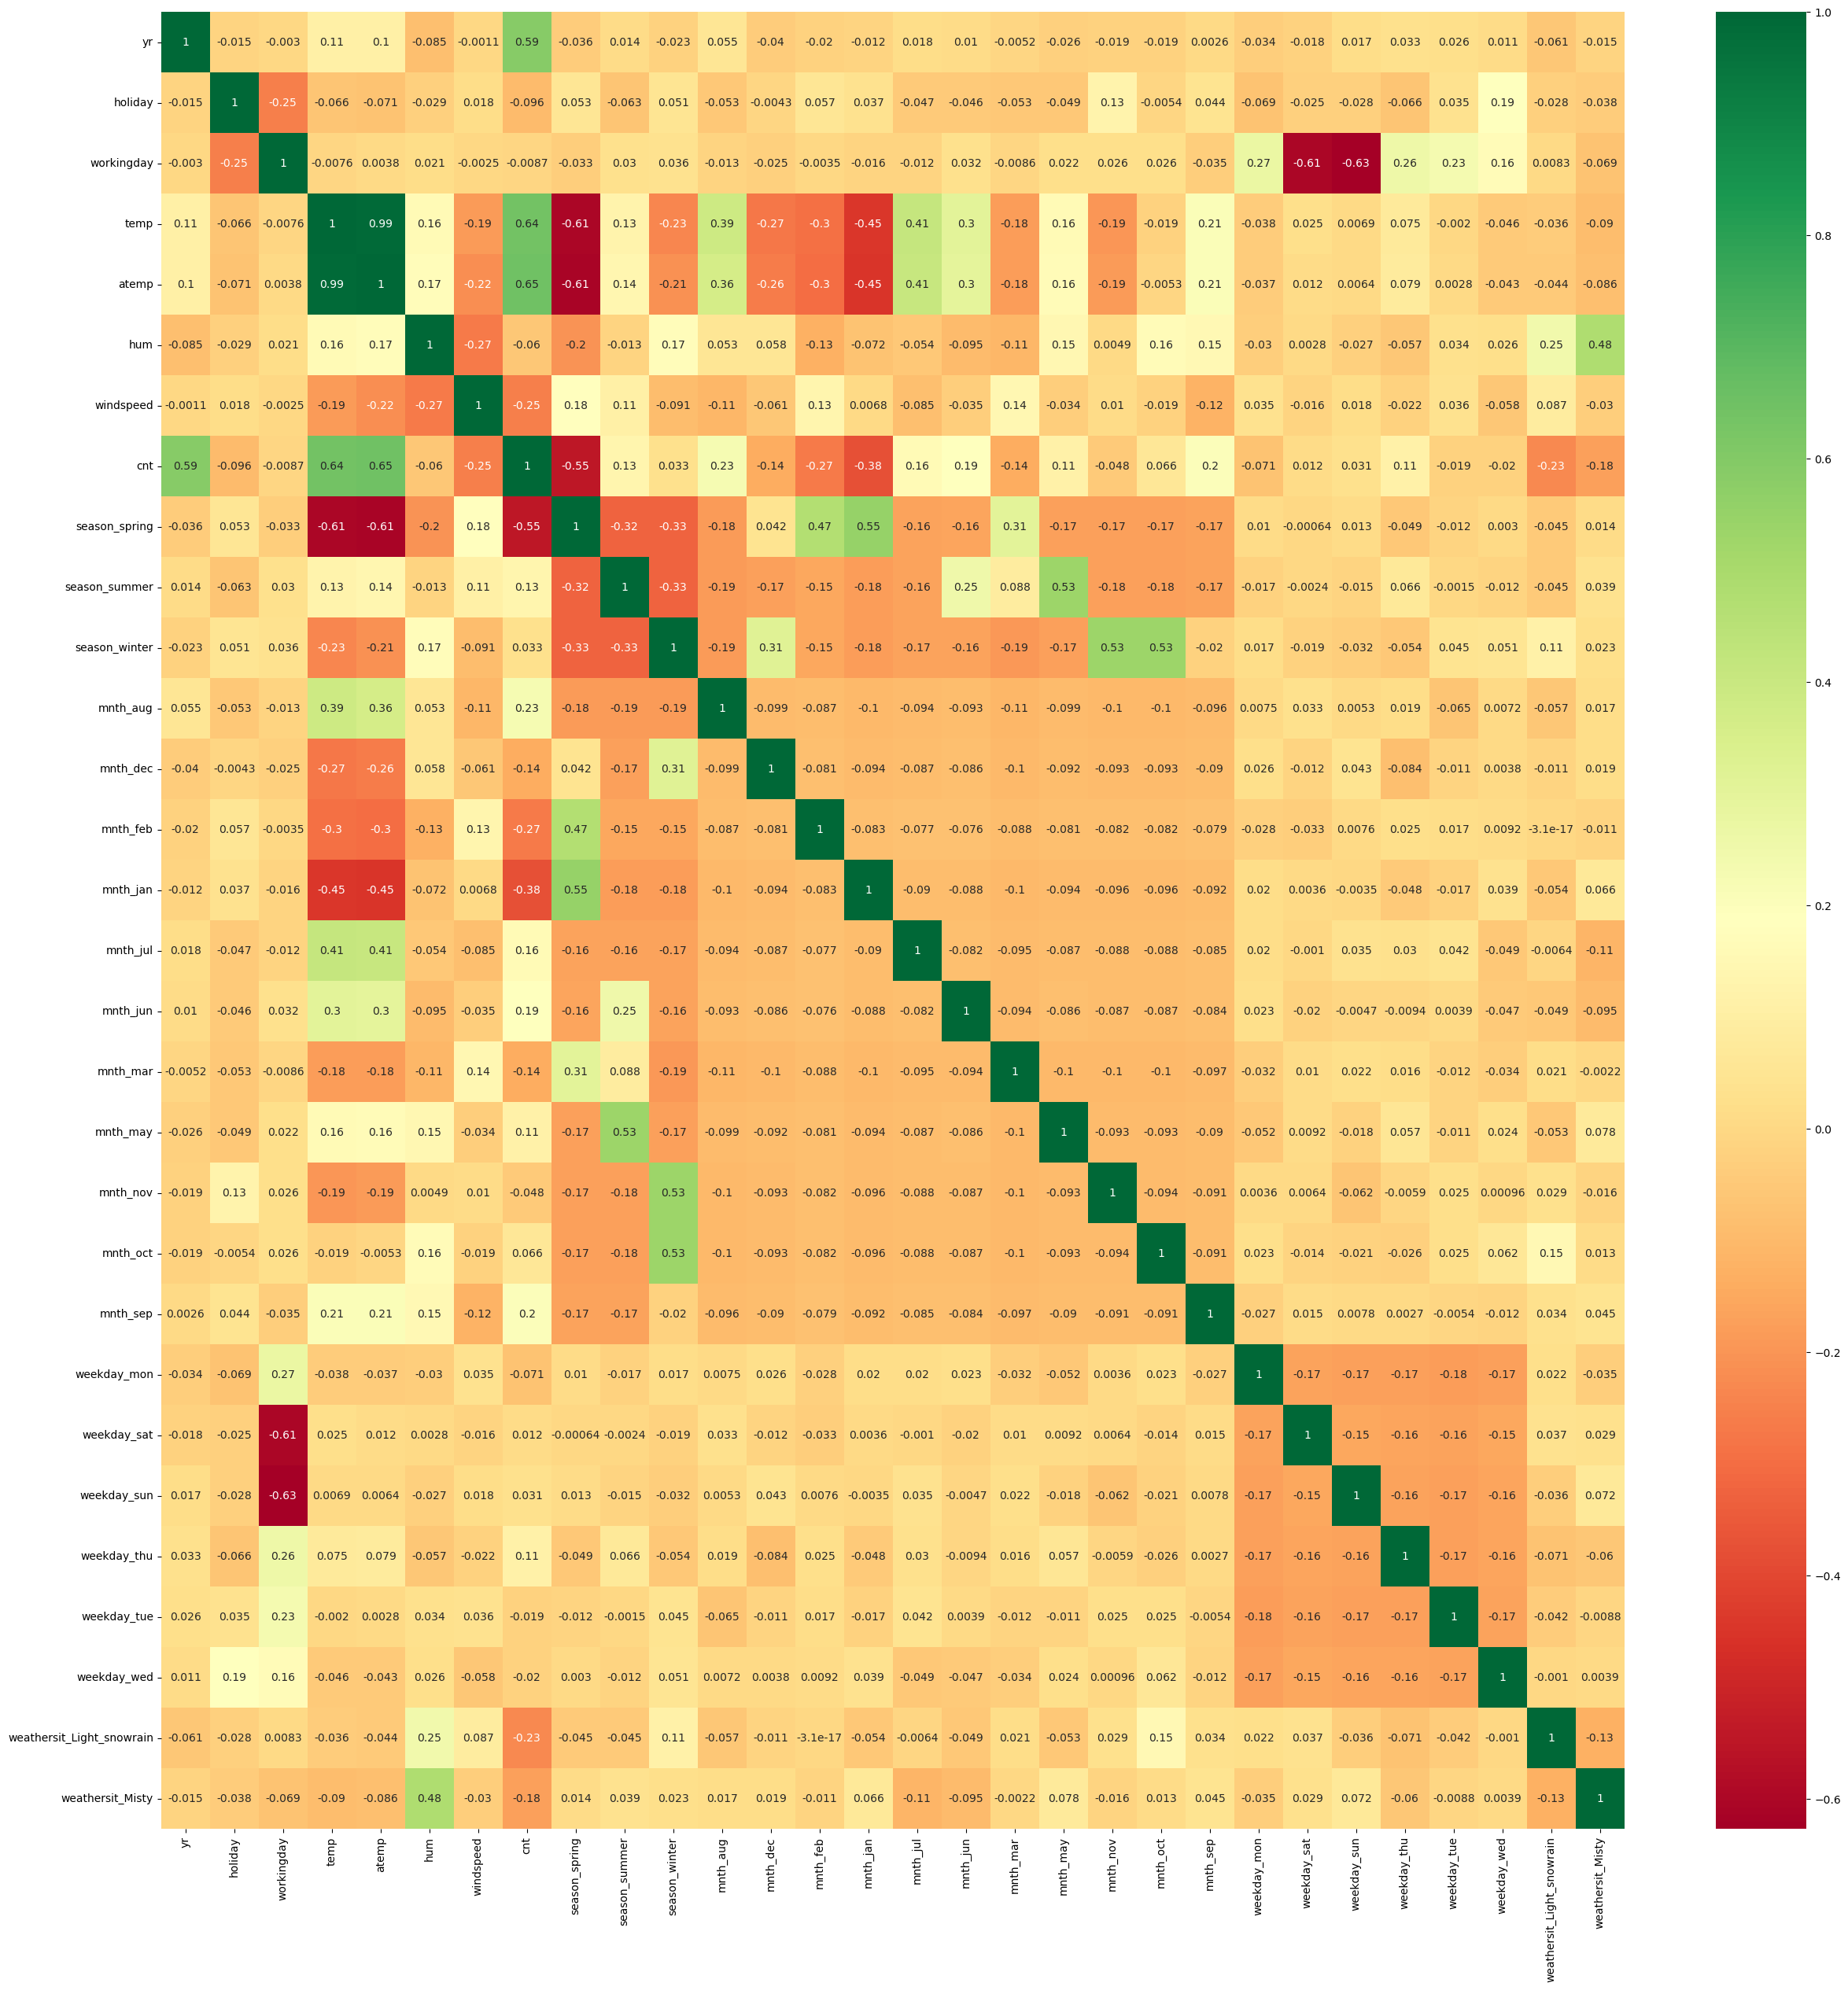

In [46]:
plt.figure(figsize = (30,30))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="RdYlGn")
plt.show()

## Step 5: Building a Linear Regression Model

### Using the RFE method first and then manual elemination of features

In [47]:
# Building the Linear Model

y_train = df_train.pop('cnt')
X_train = df_train

In [48]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# Running RFE
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [49]:
# Checking for seleced columns
rfe.support_

array([ True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True, False,  True,  True, False, False, False,
        True, False,  True, False, False, False, False, False, False,
        True,  True])

In [50]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [51]:
sel_col = X_train.columns[rfe.support_]
print(sel_col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sep', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')


In [52]:
# dataframe with RFE selected variables

X_train_rfe = X_train[sel_col]

In [53]:
# Generic function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [54]:
calculateVIF(X_train_rfe)

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
14,weathersit_Misty,2.32
0,yr,2.09
11,mnth_nov,1.83
9,mnth_jan,1.75


### Inference:
- From the above table we can see that hum column has very high VIF, hence dropping hum column.

In [55]:
# As humidity shows high VIF values hence we can drop it
X_train_rfe = X_train_rfe.drop(['hum'], axis = 1)

### Model 1

In [56]:
# Building 1st linear regression model

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Tue, 06 Feb 2024   Prob (F-statistic):          1.57e-186
Time:                        23:08:47   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Inference:
- From the above table we can see that none of the P-values are above 0.05, hence calculating VIF

In [57]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
6,season_winter,2.94
4,season_spring,2.89
5,season_summer,2.23
0,yr,2.07
10,mnth_nov,1.80
8,mnth_jan,1.66
9,mnth_jul,1.59
13,weathersit_Misty,1.56


### Inference:
- We can see that the VIF value for temp is coming out to be higher that 5, we cannot drop this column as it might be helpful to predict the cnt variable.
- Hence dropping the column with the highest P-value i.e. season_summer

### Manual feature selection

In [58]:
# As humidity shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['season_summer'], axis = 1)

### Model 2

In [59]:
# Building 2nd linear regression model

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Tue, 06 Feb 2024   Prob (F-statistic):          1.08e-186
Time:                        23:08:47   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Inference:
- From the above table we can see that none of the P-values are above 0.05, hence calculating VIF

In [60]:
calculateVIF(X_train_new)

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,season_winter,2.54
4,season_spring,2.36
0,yr,2.06
9,mnth_nov,1.80
7,mnth_jan,1.65
12,weathersit_Misty,1.53
6,mnth_dec,1.46
8,mnth_jul,1.36


### Inference:
- The P-values for all the columns are now below 0.050 and the VIF is also below 5 for all the columns.
- Hence we can consider the abovr model i.e. lr_2

In [61]:
# Checking the parameters and their coefficient values
lr_2.params

const                        0.289327
yr                           0.234795
holiday                     -0.091280
temp                         0.402583
windspeed                   -0.154010
season_spring               -0.103373
season_winter                0.064977
mnth_dec                    -0.050984
mnth_jan                    -0.055626
mnth_jul                    -0.064343
mnth_nov                    -0.048827
mnth_sep                     0.053670
weathersit_Light_snowrain   -0.294885
weathersit_Misty            -0.081190
dtype: float64

## Step 6: Residual analysis of train data

In [62]:
X_train_lm_2

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weathersit_Light_snowrain,weathersit_Misty
653,1.0,1,0,0.509887,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,1,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.355596,0,0,0,0,0,0,0,0,1
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,1,0,0,0,0,0,1


In [63]:
y_train_pred = lr_2.predict(X_train_lm_2)

### Normality in errors

C:\Users\anmol\AppData\Local\Temp\ipykernel_11376\3536760436.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_pred), bins = 20)


Text(0.5, 0, 'Errors')

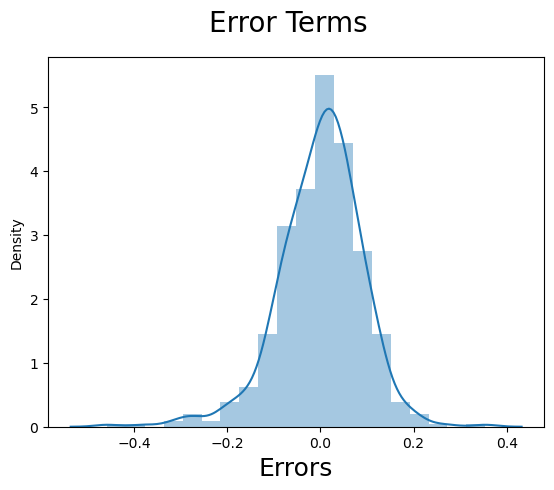

In [64]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

## Step 7: Making predictions using final model

In [65]:
num_cols

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [66]:
df_test

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,1,0.257562,0.243430,0.708888,0.287411,0.336516,1,0,...,0,0,0,0,0,0,1,0,0,1
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0.757478,0,0,...,0,0,0,0,0,0,0,1,0,0
127,0,0,1,0.584649,0.577380,0.650923,0.069510,0.495973,0,1,...,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0.868615,0,0,...,1,0,0,0,0,1,0,0,0,1


In [67]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snowrain,weathersit_Misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
y_test= df_test.pop('cnt')
X_test= df_test

In [69]:
# Kepping only the necessary columns in X_test, according to the model. 
col1 = X_train_new.columns

In [70]:
X_test = X_test[col1]

In [71]:
X_test

,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0.831783,0.084219,0,0,0,0,1,0,0,0,1
535,1,0,0.901354,0.153728,0,0,0,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,0,0,0,0,0,1
221,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0.257562,0.287411,1,0,0,0,0,0,0,0,1
702,1,0,0.519232,0.283397,0,1,1,0,0,0,0,0,0
127,0,0,0.584649,0.069510,0,0,0,0,0,0,0,0,0
640,1,0,0.745598,0.052115,0,1,0,0,0,0,0,0,1


In [72]:
# Adding a constant variable.
X_test_lm_2 = sm.add_constant(X_test)

In [73]:
X_test_lm_2

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_dec,mnth_jan,mnth_jul,mnth_nov,mnth_sep,weathersit_Light_snowrain,weathersit_Misty
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,0,0,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,1,0,0.257562,0.287411,1,0,0,0,0,0,0,0,1
702,1.0,1,0,0.519232,0.283397,0,1,1,0,0,0,0,0,0
127,1.0,0,0,0.584649,0.069510,0,0,0,0,0,0,0,0,0
640,1.0,1,0,0.745598,0.052115,0,1,0,0,0,0,0,0,1


In [74]:
# Predicting the y values
y_pred = lr_2.predict(X_test_lm_2)

In [75]:
r2 = r2_score(y_test, y_pred)
#round(r2,4)

In [76]:
r2

0.8161282341346277

## Step 8: Model evaluation

Text(0, 0.5, 'y_pred')

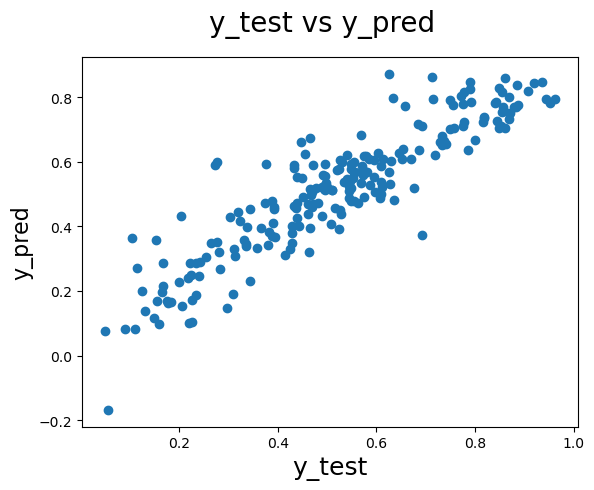

In [77]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [78]:
lr_2.params

const                        0.289327
yr                           0.234795
holiday                     -0.091280
temp                         0.402583
windspeed                   -0.154010
season_spring               -0.103373
season_winter                0.064977
mnth_dec                    -0.050984
mnth_jan                    -0.055626
mnth_jul                    -0.064343
mnth_nov                    -0.048827
mnth_sep                     0.053670
weathersit_Light_snowrain   -0.294885
weathersit_Misty            -0.081190
dtype: float64

## The final equation

cnt = 0.289 + 0.234(yr) - 0.091(holiday) + 0.402(temp) - 0.154(windspeed) - 0.103(season_spring) + 0.064(season_winter) - 0.050(mnth_dec) - 0.055(mnth_jan) - 0.064(mnth_jul) -0.048(mnth_nov) + 0.053(mnth_sep) - 0.294(weathersit_Light_snowrain) - 0.081(weathersit_Misty)

### The demand for bikes depends on yr, temp, holiday, windspeed, season_spring, season_winter, mnth_dec, mnth_jan, mnth_jul, mnth_nov, mnth_sep, weathersit_Light_snowrain, weathersit_Misty.

In [79]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.8045


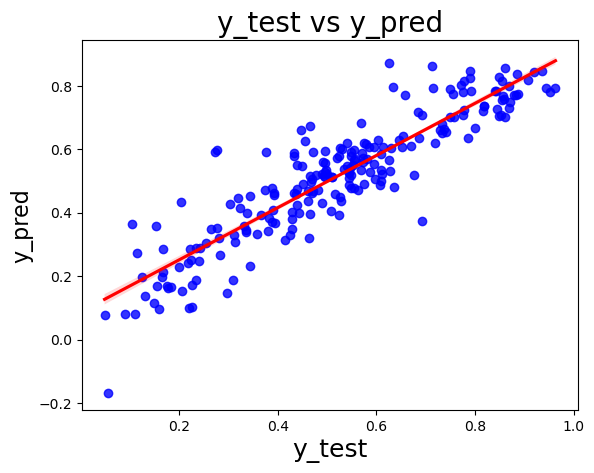

In [80]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Inference: 
- Train dataset R^2          : 0.834
- Test dataset R^2           : 0.8161
- Train dataset Adjusted R^2 : 0.834    
- Test dataset Adjusted R^2  : 0.8045